# 1

In [297]:
import numpy as np
from varname import nameof

# adapted from stack overflow
def bmatrix(a, var_name, exercise=1):
    """Stores in a file a LaTeX bmatrix from a numpy array."""
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join([f"{float(x):.6g}" for x in l.split()]) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    with open(f"./aux-matrices/ex-{exercise}/{var_name}.tex", 'w+') as f:
      f.write('\n'.join(rv))

In [298]:
# Initial data

x_1 = np.zeros((2,1))
x_2 = np.array([[4], [0]])
x_3 = np.array([[2], [1]])
x_4 = np.array([[6], [3]])

bmatrix(x_1, nameof(x_1))
bmatrix(x_2, nameof(x_2))
bmatrix(x_3, nameof(x_3))
bmatrix(x_4, nameof(x_4))

SAMPLES = [x_1, x_2, x_3, x_4]

I = np.eye(2)
bmatrix(I, nameof(I))

In [299]:
mu = np.sum(SAMPLES, axis=0) / len(SAMPLES)
bmatrix(mu, nameof(mu))

In [300]:
Sigma = np.zeros((2,2))
for x in SAMPLES:
  Sigma += (x - mu) @ (x - mu).T
Sigma /= (len(SAMPLES) - 1)
bmatrix(Sigma, nameof(Sigma))

In [301]:
eigvals, U_kl = np.linalg.eig(Sigma)
# exchange U_kl columns to match the order of the eigenvalues (ascending)
U_kl = U_kl[:, np.argsort(eigvals)]
# sort eigenvalues (ascending)
eigvals = np.sort(eigvals)
print(f"Eigenvalues: {eigvals}")
print(f"K-L transform: {U_kl}")

v_1 = U_kl[:,0].reshape(2,1)
v_2 = U_kl[:,1].reshape(2,1)

bmatrix(v_1, nameof(v_1))
bmatrix(v_2, nameof(v_2))
bmatrix(U_kl, nameof(U_kl))

# check if everything is ok
print(f"Sigma @ v_1 = {Sigma @ v_1}")
print(f"eigvals[0] * v_1 = {eigvals[0] * v_1}")
print(f"Sigma @ v_2 = {Sigma @ v_2}")
print(f"eigvals[1] * v_2 = {eigvals[1] * v_2}")

Eigenvalues: [0.7899514  7.87671527]
K-L transform: [[-0.41321628  0.91063291]
 [ 0.91063291  0.41321628]]
Sigma @ v_1 = [[-0.32642078]
 [ 0.71935574]]
eigvals[0] * v_1 = [[-0.32642078]
 [ 0.71935574]]
Sigma @ v_2 = [[7.17279618]
 [3.254787  ]]
eigvals[1] * v_2 = [[7.17279618]
 [3.254787  ]]


In [302]:
dot_v_1 = np.array([[1, 0]]) @ v_1 / np.linalg.norm(v_1)
dot_v_2 = np.array([[0, 1]]) @ v_2 / np.linalg.norm(v_2)
theta_v_1 = np.arccos(dot_v_1)
theta_v_2 = np.arccos(dot_v_2)
# theta_v_1 to degrees
theta_v_1 = theta_v_1[0][0] * 180 / np.pi
# theta_v_2 to degrees
theta_v_2 = theta_v_2[0][0] * 180 / np.pi
print(f"Dot_v_1 product: {dot_v_1}")
print(f"Theta_v_1: {theta_v_1}")
print(f"Dot_v_2 product: {dot_v_2}")
print(f"Theta_v_2: {theta_v_2}")


Dot_v_1 product: [[-0.41321628]]
Theta_v_1: 114.40703741714519
Dot_v_2 product: [[0.41321628]]
Theta_v_2: 65.59296258285482


In [303]:
MAPPED_SAMPLES = []
for x in SAMPLES:
  MAPPED_SAMPLES.append(U_kl.T @ x)
print(f"Mapped samples: {MAPPED_SAMPLES}")

mapped_x_1, mapped_x_2, mapped_x_3, mapped_x_4 = MAPPED_SAMPLES
bmatrix(mapped_x_1, nameof(mapped_x_1))
bmatrix(mapped_x_2, nameof(mapped_x_2))
bmatrix(mapped_x_3, nameof(mapped_x_3))
bmatrix(mapped_x_4, nameof(mapped_x_4))

Mapped samples: [array([[0.],
       [0.]]), array([[-1.65286513],
       [ 3.64253166]]), array([[0.08420035],
       [2.23448211]]), array([[0.25260105],
       [6.70344633]])]


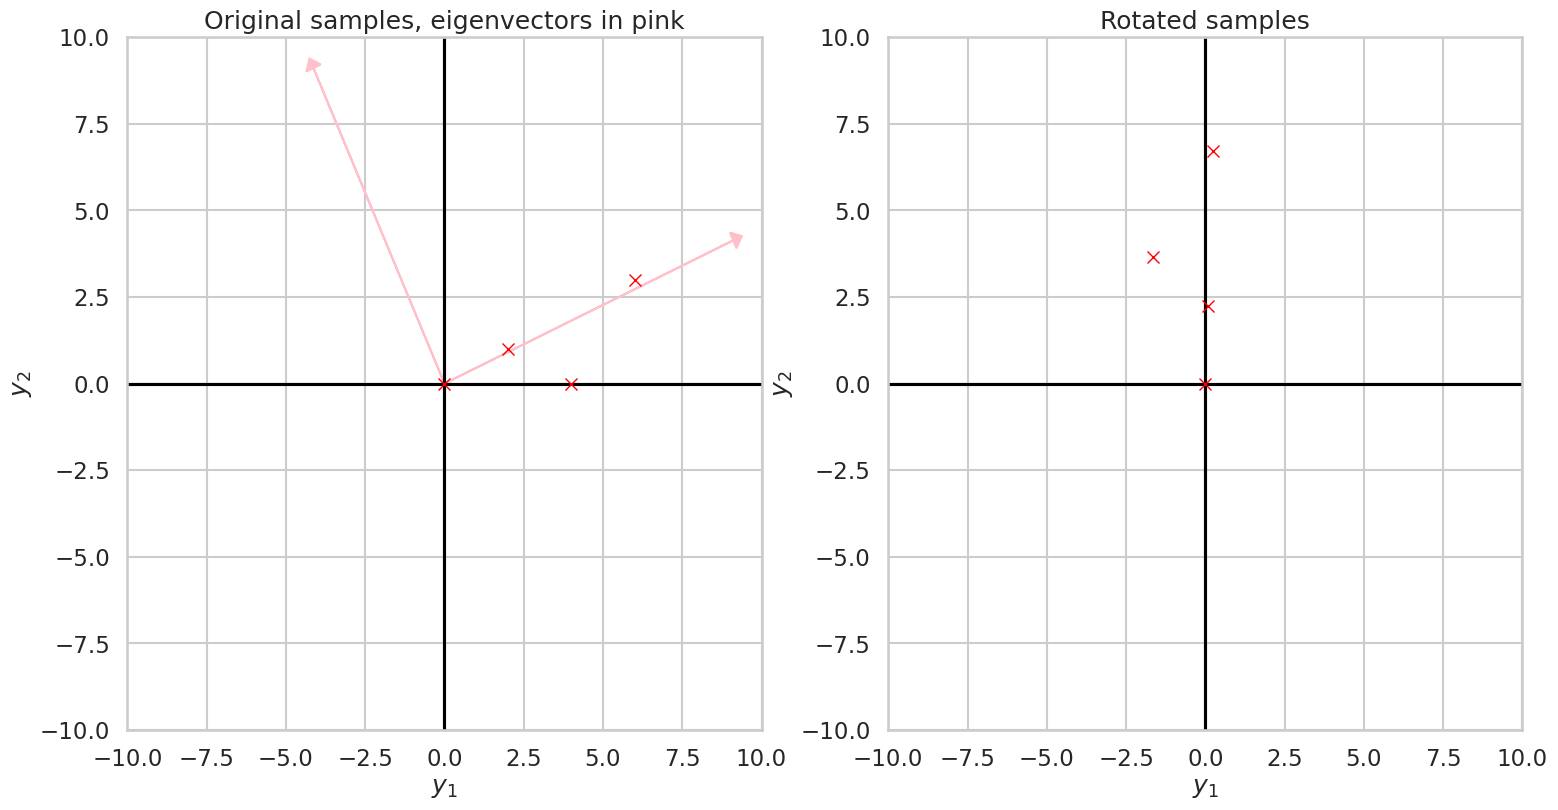

In [304]:
# Plot the original samples

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

for ax in [ax1, ax2]:
  ax.set_xlim(-10, 10)
  ax.set_ylim(-10, 10)
  ax.set_xlabel(r"$y_1$")
  ax.set_ylabel(r"$y_2$")
  ax.plot([-10, 10], [0, 0], color='black')
  ax.plot([0, 0], [-10, 10], color='black')
  if ax == ax1:
    ax.set_title("Original samples, eigenvectors in pink")
    ax.arrow(0, 0, v_1[0][0] * 10, v_1[1][0] * 10, color='pink', head_width=0.5, head_length=0.3)
    ax.arrow(0, 0, v_2[0][0] * 10, v_2[1][0] * 10, color='pink', head_width=0.5, head_length=0.3)
  else:
    ax.set_title("Rotated samples")

for x in SAMPLES:
  ax1.plot(x[0], x[1], 'x', color='red')
  x_kl = U_kl.T @ x
  ax2.plot(x_kl[0], x_kl[1], 'x', color='red')

plt.savefig("./assets/ex-1/kl-transform.png")
plt.show()

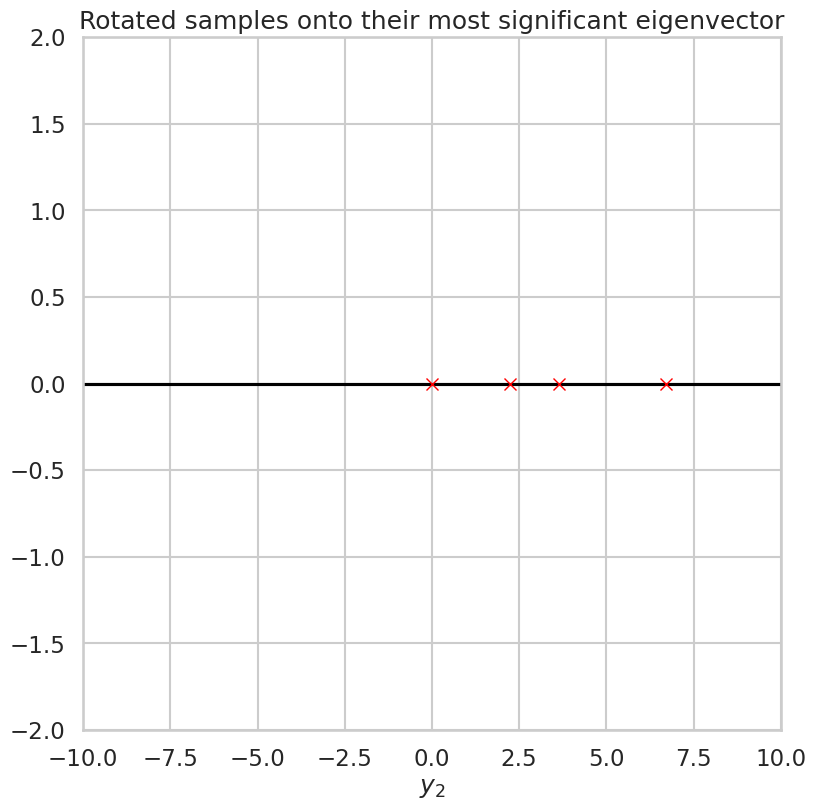

In [305]:
# Plot the samples onto their most significant eigenvector

fig, ax = plt.subplots(figsize=(9, 9))

ax.set_xlim(-10, 10)
ax.set_ylim(-2, 2)
ax.set_xlabel(r"$y_2$")

ax.plot([-10, 10], [0, 0], color='black')
ax.set_title("Rotated samples onto their most significant eigenvector")

for x in SAMPLES:
  x_kl = U_kl.T @ x
  ax.plot(x_kl[1], 0, 'x', color='red')

plt.savefig("./assets/ex-1/kl-transform-1d.png")
plt.show()

# 2)

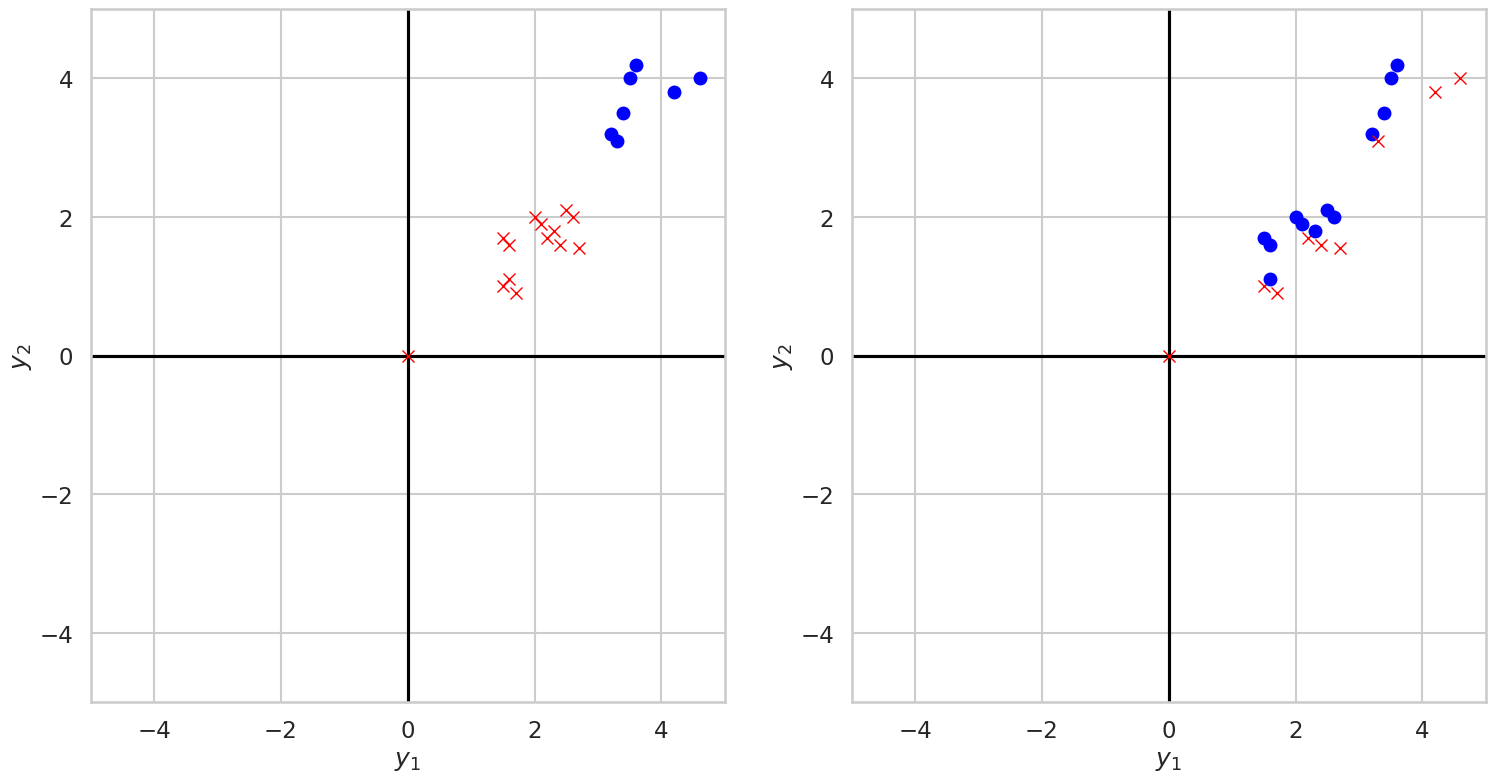

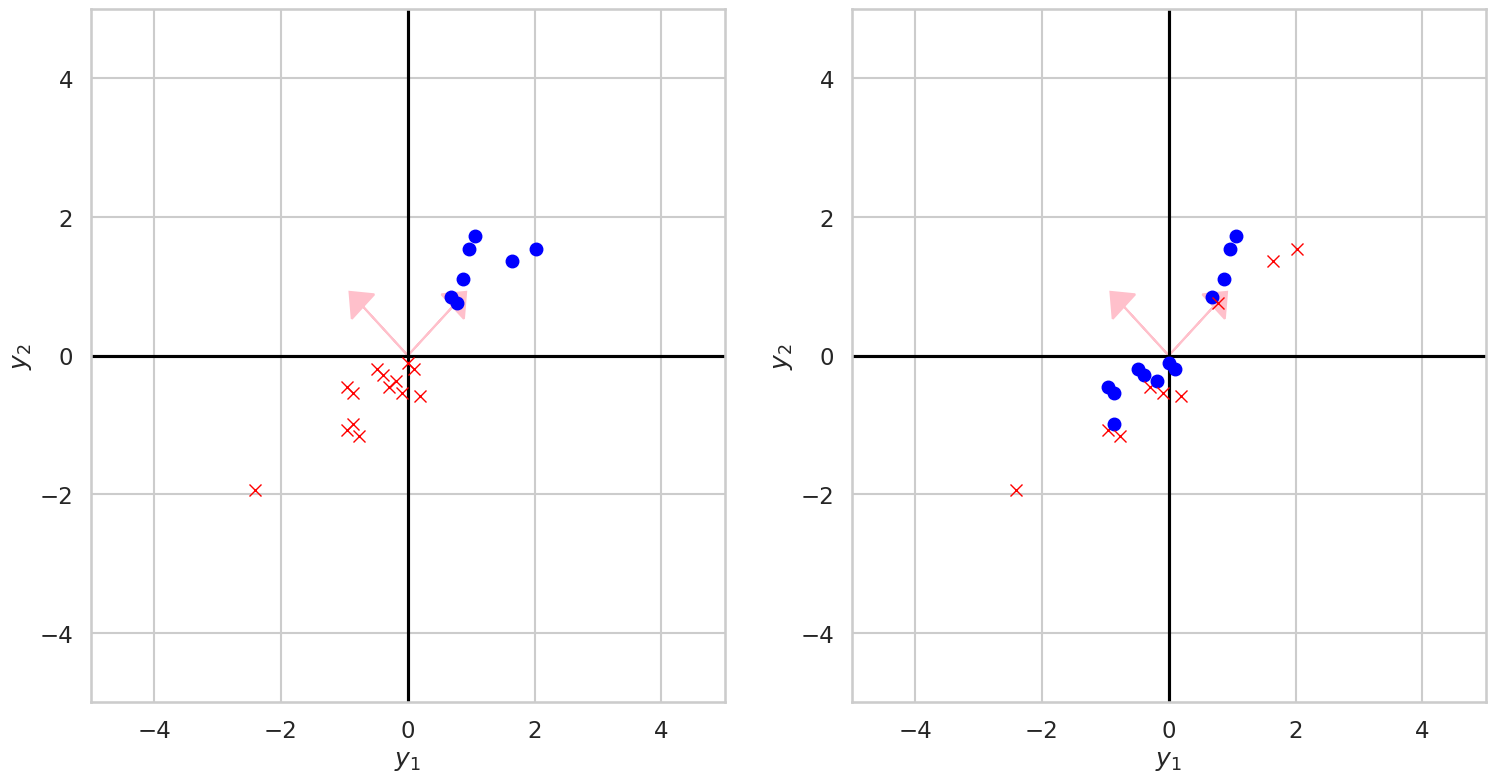

In [306]:
SAMPLES_1 = np.array([
  [0,0],
  [1.5,1],
  [1.6,1.1],
  [1.7,0.9],
  [1.5,1.7],
  [1.6,1.6],
  [2,2],
  [2.1,1.9],
  [2.2,1.7],
  [2.3,1.8],
  [2.4,1.6],
  [2.5,2.1],
  [2.6,2],
  [2.7,1.55],
  [3.2, 3.2,],
  [3.3, 3.1,],
  [3.4, 3.5,],
  [3.5, 4,],
  [3.6, 4.2,],
  [4.2, 3.8,],
  [4.6, 4,],
])

LABELS_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

SAMPLES_2 = np.array([
  [0,0],
  [1.5,1],
  [1.6,1.1],
  [1.7,0.9],
  [1.5,1.7],
  [1.6,1.6],
  [2,2],
  [2.1,1.9],
  [2.2,1.7],
  [2.3,1.8],
  [2.4,1.6],
  [2.5,2.1],
  [2.6,2],
  [2.7,1.55],
  [3.2, 3.2,],
  [3.3, 3.1,],
  [3.4, 3.5,],
  [3.5, 4,],
  [3.6, 4.2,],
  [4.2, 3.8,],
  [4.6, 4,]
])

LABELS_2 = [0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0]

def plot_samples(samples_1, samples_2, labels_1, labels_2, title, draw=False):
  # get the eigen vectors and eigen values for each sample set
  eigen_values_1, eigen_vectors_1 = np.linalg.eig(np.cov(samples_1.T))
  eigen_values_2, eigen_vectors_2 = np.linalg.eig(np.cov(samples_2.T))

  labeled_samples_1 = np.concatenate([samples_1, np.array(labels_1).reshape(-1, 1)], axis=1)
  labeled_samples_2 = np.concatenate([samples_2, np.array(labels_2).reshape(-1, 1)], axis=1)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

  for ax in [ax1, ax2]:
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel(r"$y_1$")
    ax.set_ylabel(r"$y_2$")
    ax.plot([-10, 10], [0, 0], color='black')
    ax.plot([0, 0], [-10, 10], color='black')
    if draw:
      if ax == ax1:
        ax.arrow(0, 0, eigen_vectors_1[0][0], eigen_vectors_1[1][0], color='pink', head_width=0.5, head_length=0.3)
        ax.arrow(0, 0, eigen_vectors_1[0][1], eigen_vectors_1[1][1], color='pink', head_width=0.5, head_length=0.3)
      else:
        ax.arrow(0, 0, eigen_vectors_2[0][0], eigen_vectors_2[1][0], color='pink', head_width=0.5, head_length=0.3)
        ax.arrow(0, 0, eigen_vectors_2[0][1], eigen_vectors_2[1][1], color='pink', head_width=0.5, head_length=0.3)
  
  for x in labeled_samples_1:
    if x[2] == 0:
      ax1.plot(x[0], x[1], 'x', color='red')
    else:
      ax1.plot(x[0], x[1], 'o', color='blue')
  
  for x in labeled_samples_2:
    if x[2] == 0:
      ax2.plot(x[0], x[1], 'x', color='red')
    else:
      ax2.plot(x[0], x[1], 'o', color='blue')
  
  plt.savefig(f"./assets/ex-2/{title}.png")

plot_samples(SAMPLES_1, SAMPLES_2, LABELS_1, LABELS_2, "samples")

# scale datasets to have mean 0 and variance 1
SAMPLES_1 = (SAMPLES_1 - SAMPLES_1.mean(axis=0)) / SAMPLES_1.std(axis=0)
SAMPLES_2 = (SAMPLES_2 - SAMPLES_2.mean(axis=0)) / SAMPLES_2.std(axis=0)

plot_samples(SAMPLES_1, SAMPLES_2, LABELS_1, LABELS_2, "scaled-samples", True)

# 4)

In [307]:
Sigma = np.array([[91.43, 171.92, 297.99], [171.92, 373.92, 545.21], [297.99, 545.21, 1297.26]])
bmatrix(Sigma, nameof(Sigma), 4)

v_1 = np.array([[0.2179,0.4145,0.8836]]).T
v_2 = np.array([[-0.2466,-0.8525,0.4608]]).T
v_3 = np.array([[0.9443,-0.3183,-0.0836]]).T

bmatrix(v_1, nameof(v_1), 4)
bmatrix(v_2, nameof(v_2), 4)
bmatrix(v_3, nameof(v_3), 4)


# 5)

In [308]:
v_1 = (1 / np.sqrt(2)) * np.array([[1,-1]]).T
v_2 = (1 / np.sqrt(2)) * np.array([[1,1]]).T

bmatrix(v_1, nameof(v_1), 5)
bmatrix(v_2, nameof(v_2), 5)

x_1 = np.array([[1,-1]]).T
x_2 = np.array([[0,1]]).T
x_3 = np.array([[-1,0]]).T

SAMPLES = [x_1, x_2, x_3]

bmatrix(x_1, nameof(x_1), 5)
bmatrix(x_2, nameof(x_2), 5)
bmatrix(x_3, nameof(x_3), 5)

In [309]:
U_kl = np.hstack([v_1, v_2])
bmatrix(U_kl, nameof(U_kl), 5)
U_kl_t = U_kl.T
bmatrix(U_kl_t, nameof(U_kl_t), 5)

In [310]:
x_1_eig = np.dot(U_kl_t, x_1)
bmatrix(x_1_eig, nameof(x_1_eig), 5)
x_2_eig = np.dot(U_kl_t, x_2)
bmatrix(x_2_eig, nameof(x_2_eig), 5)
x_3_eig = np.dot(U_kl_t, x_3)
bmatrix(x_3_eig, nameof(x_3_eig), 5)

EIG_SAMPLES = [x_1_eig, x_2_eig, x_3_eig]

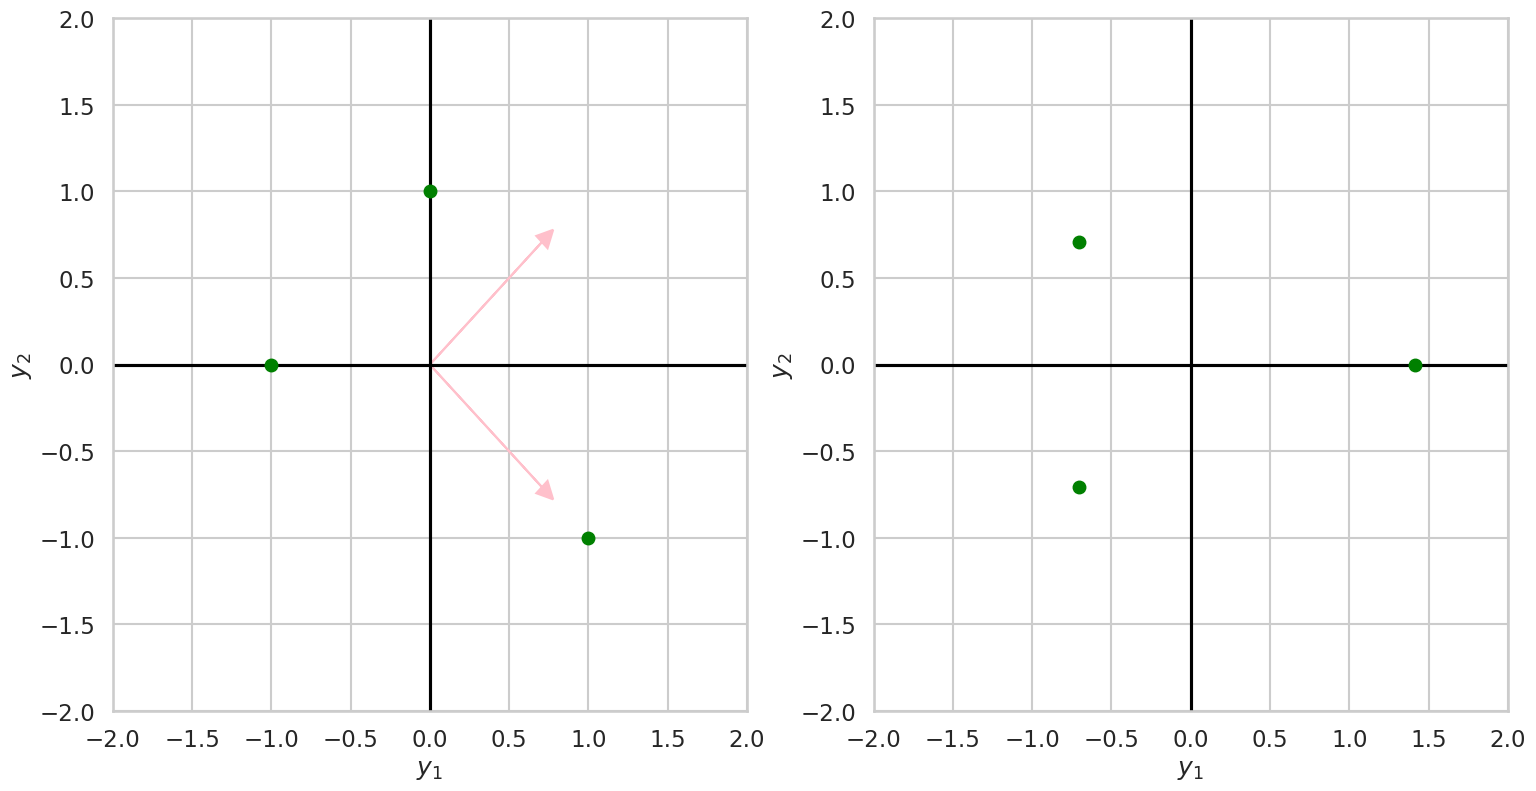

In [317]:
# Plot, side by side, the original samples and the samples in the eigenbasis

def plot_samples(samples, eigen_samples, title):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

  for ax in [ax1, ax2]:
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xlabel(r"$y_1$")
    ax.set_ylabel(r"$y_2$")
    ax.plot([-10, 10], [0, 0], color='black')
    ax.plot([0, 0], [-10, 10], color='black')
    if ax == ax1:
      ax.arrow(0, 0, v_1[0][0], v_1[1][0], color='pink', head_width=0.1, head_length=0.1)
      ax.arrow(0, 0, v_2[0][0], v_2[1][0], color='pink', head_width=0.1, head_length=0.1)
  
  for x in samples:
    ax1.plot(x[0][0], x[1][0], 'o', color='green')
  
  for x in eigen_samples:
    ax2.plot(x[0][0], x[1][0], 'o', color='green')
  
  plt.savefig(f"./assets/ex-5/{title}.png")

plot_samples(SAMPLES, EIG_SAMPLES, "samples")